In [45]:
# IMPORT NECESSARY LIBRARIES
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# IMPORT EXCEL DATA INTO DATAFRAME
file_path = '/content/drive/My Drive/ECGR4105/D3.csv'
df = pd.read_csv(file_path)
print(df.head())

# Rows: [0, 99]


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


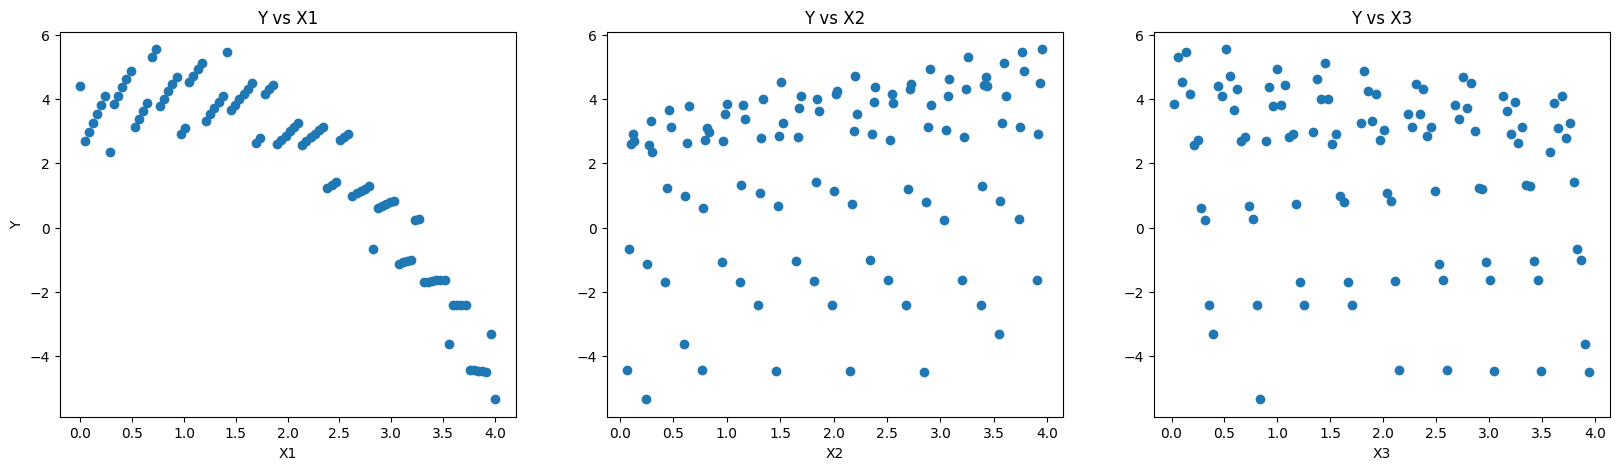

In [47]:
# VISUALIZE DATA
plt.figure

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(df.X1, df.Y)
plt.title('Y vs X1')
plt.xlabel('X1')
plt.ylabel('Y')

plt.subplot(1,3,2)
plt.scatter(df.X2, df.Y)
plt.title('Y vs X2')
plt.xlabel('X2')

plt.subplot(1,3,3)
plt.scatter(df.X3, df.Y)
plt.title('Y vs X3')
plt.xlabel('X3')

plt.show()


In [48]:
# INCORPORATE BIAS COLUMN INTO DATAFRAME
numObservations = df.X1.size # Find number of observations (What size column of 1.0's do I need?)
X0 = np.ones((numObservations, 1)) # (rows, columns); This created a numObservations x 1 numpy array of 1.0's
X0 = pd.DataFrame(X0) # Converts numpy array --> dataframe
df.insert(0, "bias", X0) # Adds X0, titled as "bias", into 0th index column of my dataframe of excel data
display(df) # Display to visually verify it worked

,bias,X1,X2,X3,Y
0,1.0,0.000000,3.440000,0.440000,4.387545
1,1.0,0.040404,0.134949,0.888485,2.679650
2,1.0,0.080808,0.829899,1.336970,2.968490
3,1.0,0.121212,1.524848,1.785455,3.254065
4,1.0,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...,...
95,1.0,3.838384,1.460202,3.046061,-4.440595
96,1.0,3.878788,2.155152,3.494545,-4.458663
97,1.0,3.919192,2.850101,3.943030,-4.479995
98,1.0,3.959596,3.545051,0.391515,-3.304593


In [49]:
# SET UP DATA FOR GRADIENT DESCENT
x1 = df.loc[:, ['bias', 'X1']] # Isolates a new matrix with every row of bias and X1 column
x2 = df.loc[:, ['bias', 'X2']]
x3 = df.loc[:, ['bias', 'X3']]
y = df.loc[:, ['Y']]
thetas_x1 = np.zeros(2) # Two parameters: theta0 for bias, theta1 for X1
thetas_x2 = np.zeros(2)
thetas_x3 = np.zeros(2)
display(thetas_x1)

array([0., 0.])

### Cost Function
$J(\theta)= \frac{1}{2m}\sum_{i=1}^m (h_\theta(x_i)-y_i)^2$

$$m = \text{Number of observations}$$
$$h_\theta(x_i) = \text{Predicted value of y based on $x_i$}$$
$$h_\theta(x_i)-y_i = \text{Error from predicted to actual}$$

In [50]:
# DEFINE A COMPUTE COST FUNCTION
def Compute_Cost(X, y, theta):
  m = len(X) # numObservations
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  cost = 1/(2*m) * np.sum(sqrErrors)
  return cost


In [51]:
# DEFINE GRADIENT DESCENT FUNCTION
def Gradient_Descent(X, y, theta, alpha, iterations):
  costHistory = np.zeros(iterations)
  m = len(X)
  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sumDelta = (alpha / m) * X.transpose().dot(errors)
    theta = theta - sumDelta
    costHistory[i] = Compute_Cost(X, y, theta)
  return theta, costHistory

In [52]:
# ENSURE ARGUMENTS PASSED TO GRADIENT DESCENT ARE NUMPY ARRAYS
x1Array = np.array(x1)
x2Array = np.array(x2)
x3Array = np.array(x3)
yArray = np.array(y)

In [53]:
# CONVERT thetas_x1, thetas_x2, thetas_x3 TO COLUMN VECTOR
thetas_x1 = thetas_x1.reshape(-1, 1)
thetas_x2 = thetas_x2.reshape(-1, 1)
thetas_x3 = thetas_x3.reshape(-1, 1)

In [54]:
# PERFORM GRADIENT DESCENT FOR X1
ALPHA = 0.1
ITERATIONS = 175
thetaX1, costHistoryX1 = Gradient_Descent(x1Array, yArray, thetas_x1, ALPHA, ITERATIONS)
print('Final value of theta for x1 =', thetaX1)
print('costHistory =', costHistoryX1)

Final value of theta for x1 = [[ 5.81230078]
 [-1.99332579]]
costHistory = [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.10023842 1.09518757 1.09035808 

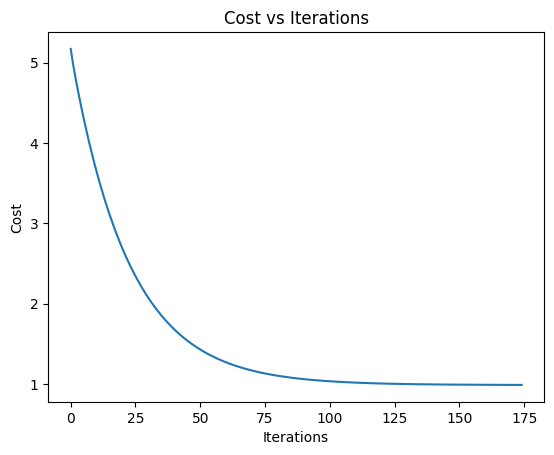

In [55]:
# ANALYZE ALPHA AND ITERATIONS BY PLOTTING costHistory
plt.plot(costHistoryX1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

Final value of theta for x2 = [[0.35351034]
 [0.70304796]]
costHistory = [4.5369622  4.06234927 3.83409365 3.72418051 3.6711185  3.64537047
 3.6327483  3.62643665 3.62316171 3.6213508  3.62024836 3.61949136
 3.6189053  3.61840625 3.61795379]


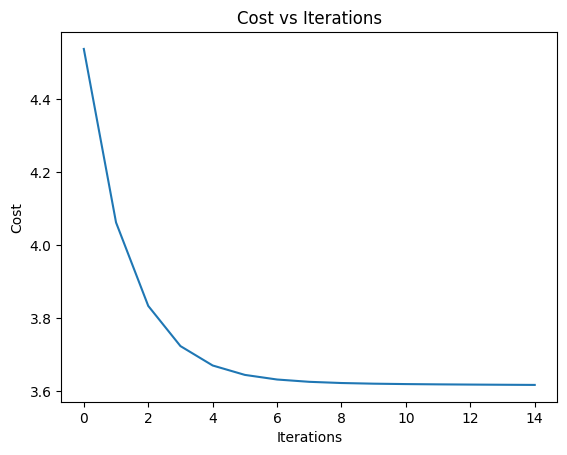

In [56]:
# PERFORM GRADIENT DESCENT FOR X2
ALPHA = 0.05
ITERATIONS = 15
thetaX2, costHistoryX2 = Gradient_Descent(x2Array, yArray, thetas_x2, ALPHA, ITERATIONS)
print('Final value of theta for x2 =', thetaX2)
print('costHistory =', costHistoryX2)

# DISPLAY COST VS ITERATIONS FOR alpha AND iterations ANALYSIS
plt.plot(costHistoryX2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

Final value of theta for x3 = [[ 2.78358219]
 [-0.4857427 ]]
costHistory = [4.66843939 4.49602325 4.43685075 4.39757676 4.3628731  4.3301743
 4.29900486 4.26923359 4.240788   4.21360745 4.18763542 4.16281813
 4.13910424 4.11644469 4.09479259 4.07410317 4.05433361 4.03544302
 4.01739232 4.00014417 3.98366289 3.96791437 3.95286604 3.93848678
 3.92474683 3.91161776 3.89907242 3.88708486 3.87563028 3.86468497
 3.8542263  3.84423263 3.83468329 3.82555851 3.81683943 3.80850801
 3.80054701 3.79293996 3.78567113 3.77872547 3.77208862 3.76574686
 3.75968705 3.75389666 3.74836372 3.74307678 3.7380249  3.73319763
 3.72858498 3.72417742 3.71996582 3.71594147 3.71209604 3.70842159
 3.7049105  3.70155552 3.69834971 3.69528643 3.69235934 3.6895624
 3.68688981 3.68433604 3.68189582 3.67956409 3.67733603 3.67520703
 3.67317269 3.67122879 3.66937133 3.66759645 3.66590048 3.66427991
 3.6627314  3.66125173 3.65983785 3.65848684 3.65719589 3.65596234
 3.65478363 3.65365733 3.6525811  3.65155273 3.65057007 

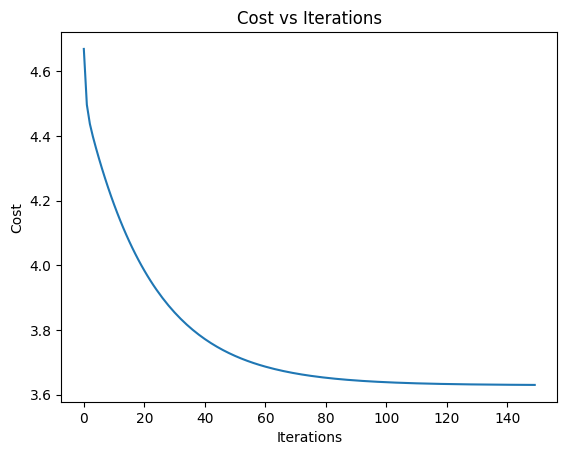

In [57]:
# PERFORM GRADIENT DESCENT FOR X3
ALPHA = 0.1
ITERATIONS = 150
thetaX3, costHistoryX3 = Gradient_Descent(x3Array, yArray, thetas_x3, ALPHA, ITERATIONS)
print('Final value of theta for x3 =', thetaX3)
print('costHistory =', costHistoryX3)

# DISPLAY COST VS ITERATIONS FOR alpha AND iterations ANALYSIS
plt.plot(costHistoryX3)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

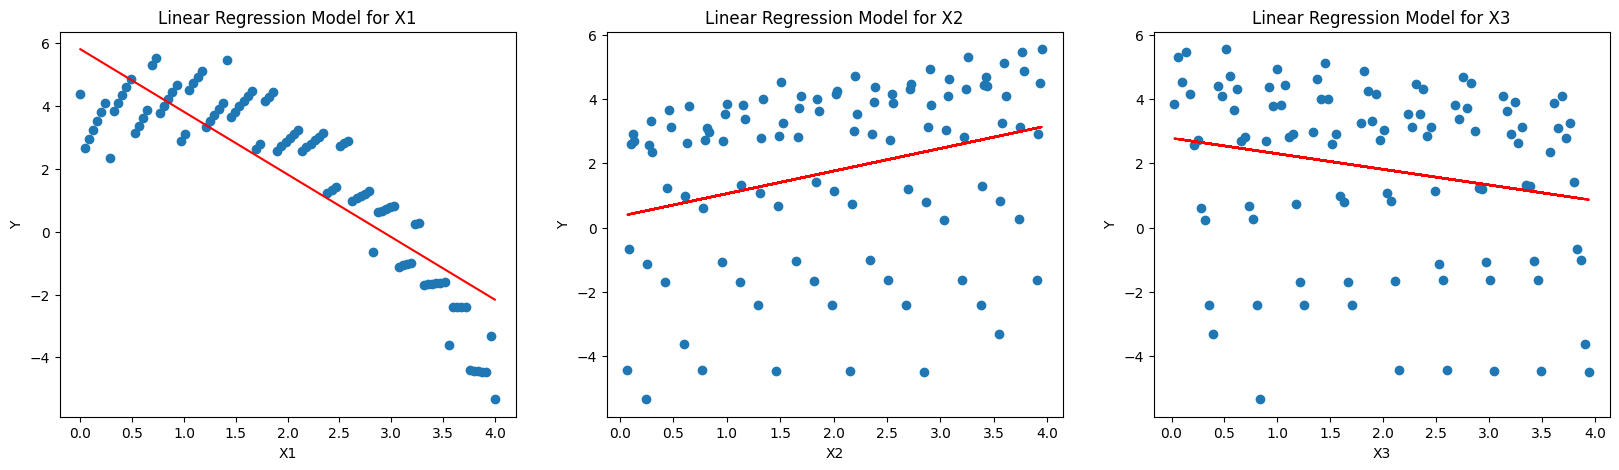

In [58]:
# PLOT x1, x2, x3 AND THEIR RESPECTIVE MODELS
plt.figure
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Model for X1')
plt.scatter(x1.X1, y)
plt.plot(x1.X1, x1.dot(thetaX1), color='red')

plt.subplot(1,3,2)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Model for X2')
plt.scatter(x2.X2, y)
plt.plot(x2.X2, x2.dot(thetaX2), color='red')

plt.subplot(1,3,3)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Model for X3')
plt.scatter(x3.X3, y)
plt.plot(x3.X3, x3.dot(thetaX3), color='red')

plt.show()

In [59]:
print('[For X1]')
print('theta0 = ', thetaX1[0])
print('theta1 = ', thetaX1[1])
print('[For X2]')
print('theta0 = ', thetaX2[0])
print('theta1 = ', thetaX2[1])
print('[For X3]')
print('theta0 = ', thetaX3[0])
print('theta1 = ', thetaX3[1])

[For X1]
theta0 =  [5.81230078]
theta1 =  [-1.99332579]
[For X2]
theta0 =  [0.35351034]
theta1 =  [0.70304796]
[For X3]
theta0 =  [2.78358219]
theta1 =  [-0.4857427]


## Problem 1

### 1. Linear Regression Models
\begin{aligned}
y &= 5.812 - 1.993 X_1 \\
y &= 0.354 + 0.703 X_2 \\
y &= 2.784 - 0.486 X_3
\end{aligned}



### 2. Plot the final regression model and loss over the iteration per each explanatory variable.

Text(0.5, 1.0, 'Cost vs Iterations')

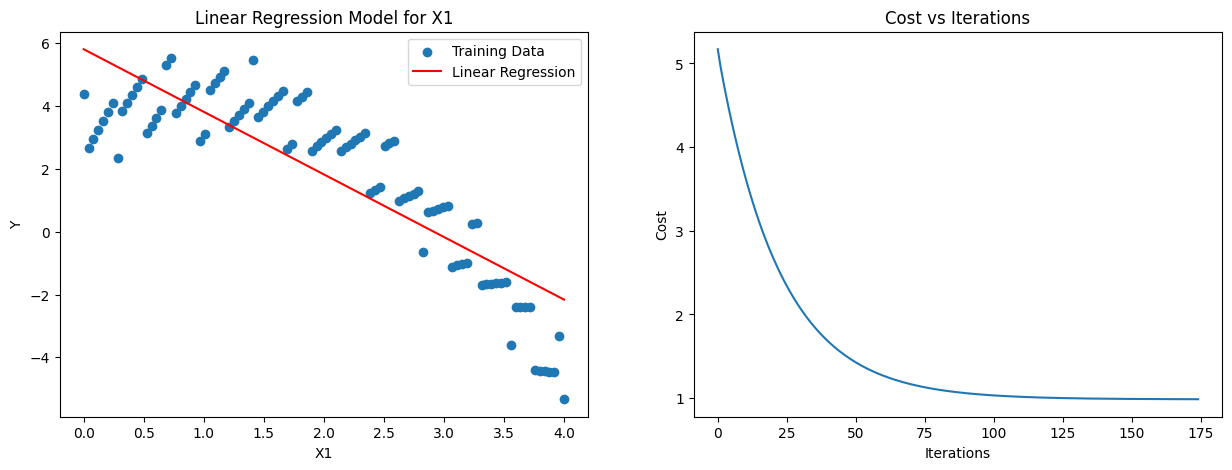

In [60]:
plt.figure
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Model for X1')
plt.scatter(x1.X1, y, label='Training Data')
plt.plot(x1.X1, x1.dot(thetaX1), color='red', label='Linear Regression')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.plot(costHistoryX1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

Text(0.5, 1.0, 'Cost vs Iterations')

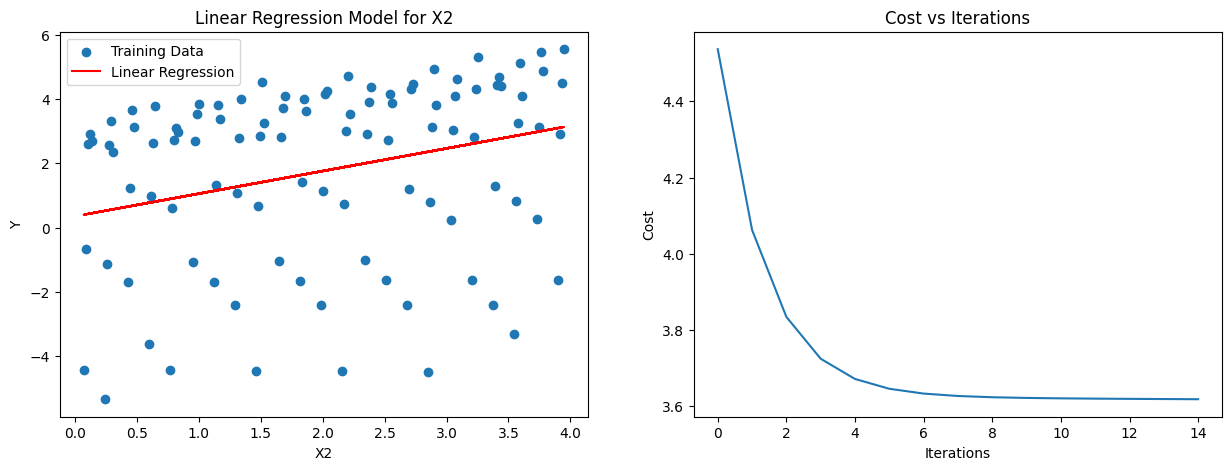

In [61]:
plt.figure
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Model for X2')
plt.scatter(x2.X2, y, label='Training Data')
plt.plot(x2.X2, x2.dot(thetaX2), color='red', label='Linear Regression')
plt.legend(loc='upper left')


plt.subplot(1,2,2)
plt.plot(costHistoryX2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

Text(0.5, 1.0, 'Cost vs Iterations')

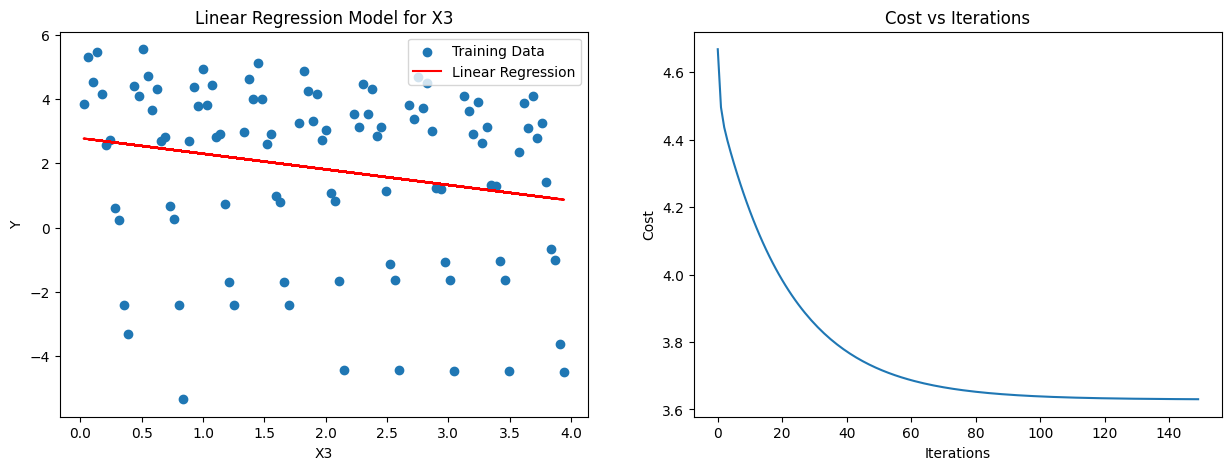

In [62]:
plt.figure
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Model for X3')
plt.scatter(x3.X3, y, label='Training Data')
plt.plot(x3.X3, x3.dot(thetaX3), color='red', label='Linear Regression')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(costHistoryX3)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

### 3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
Variable X1 has the lowest cost for the output.

### Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.
A learning rate that is too large can lead to divergence and the cost increasing. A learning rate that is too small would require a great number of iterations before it achieves optimal cost. If not enough iterations are executed, the cost may never reach its convergent value. The number of iterations must be chosen to efficiently utilize compute while maintaining enough iterations to find the convergent cost. For this assignment, a base iterations value of 1500 was chosen. After analyzing the Cost vs Iterations chart, iterations was adjusted to avoid wasting computational resources.


# FINDING A LINEAR REGRESSION MODEL WHEN ALL FEATURES ARE CONSIDERED SIMULTANEOUSLY

In [63]:
print(df)

    bias        X1        X2        X3         Y
0    1.0  0.000000  3.440000  0.440000  4.387545
1    1.0  0.040404  0.134949  0.888485  2.679650
2    1.0  0.080808  0.829899  1.336970  2.968490
3    1.0  0.121212  1.524848  1.785455  3.254065
4    1.0  0.161616  2.219798  2.233939  3.536375
..   ...       ...       ...       ...       ...
95   1.0  3.838384  1.460202  3.046061 -4.440595
96   1.0  3.878788  2.155152  3.494545 -4.458663
97   1.0  3.919192  2.850101  3.943030 -4.479995
98   1.0  3.959596  3.545051  0.391515 -3.304593
99   1.0  4.000000  0.240000  0.840000 -5.332455

[100 rows x 5 columns]


In [64]:
X = df.loc[:, ['bias', 'X1', 'X2', 'X3']]
thetas = np.zeros(4)
thetas = thetas.reshape(-1, 1)
#print(thetas)
Xarray = np.array(X)
#print(X)

Final value of theta = [[ 4.88998995]
 [-1.94379722]
 [ 0.602656  ]
 [-0.20342611]]


<ipython-input-51-a6dd53baed7d>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  costHistory[i] = Compute_Cost(X, y, theta)


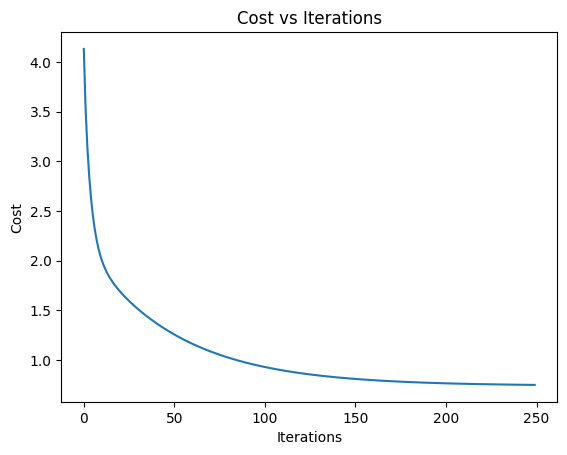

In [76]:
ALPHA = 0.1
ITERATIONS = 250
allThetas, allCostHistory = Gradient_Descent(Xarray, y, thetas, ALPHA, ITERATIONS)
print('Final value of theta =', allThetas)
#print('costHistory =', allCostHistory)

plt.plot(allCostHistory)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

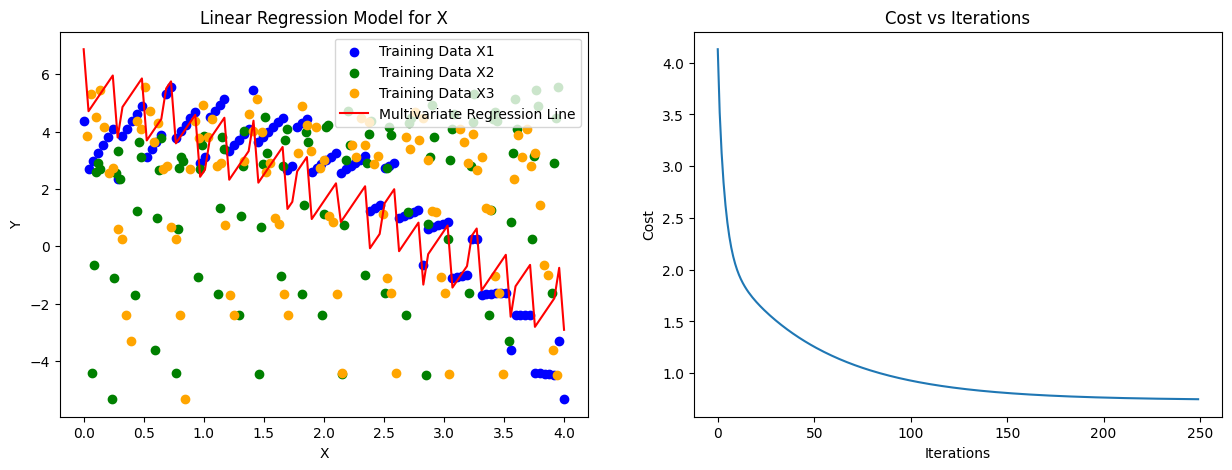

In [79]:
predictions = Xarray.dot(allThetas)  # Compute predicted Y using all features

plt.figure
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model for X')
plt.scatter(X.X1, y, color='blue', label='Training Data X1')
plt.scatter(X.X2, y, color='green', label='Training Data X2')
plt.scatter(X.X3, y, color='orange', label='Training Data X3')
plt.plot(X.X1, predictions, color='red', label='Multivariate Regression Line')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(allCostHistory)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Problem 2
### 1. Final Linear Model
 \begin{aligned}
 y = 4.89 - 1.944 X_1 + 0.603 X_2 - 0.203 X_3
 \end{aligned}

In [80]:
def questionFour(var1, var2, var3):
  return 4.89 - 1.944 * var1 + 0.603 * var2 - 0.203 * var3
print(questionFour(1, 1, 1))
print(questionFour(2,0,4))
print(questionFour(3,2,1))

3.3459999999999996
0.18999999999999972
0.06099999999999978
